In [5]:
import pandas as pd
import matplotlib as plt

data = pd.read_csv('../datasets/cleaned/substance_data.csv')
print(data.shape)
print(data.info())

(27909, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27909 entries, 0 to 27908
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         27909 non-null  object
 1   Source            27909 non-null  object
 2   Specific_Measure  27909 non-null  object
 3   Type_Event        27909 non-null  object
 4   Region            27909 non-null  object
 5   PRUID             27909 non-null  int64 
 6   Time_Period       27909 non-null  object
 7   Year_Quarter      27909 non-null  object
 8   Aggregator        20284 non-null  object
 9   Disaggregator     20284 non-null  object
 10  Unit              27909 non-null  object
 11  Value             23910 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB
None


In [2]:
print(data.describe())

              PRUID
count  27909.000000
mean      30.964026
std       22.534189
min        1.000000
25%       11.000000
50%       35.000000
75%       48.000000
max       63.000000


In [8]:
total_apr_opioid_deaths = data[
    (data['Substance'] == 'Opioids')&
    (data['Region']=='Canada')&
    (data['Specific_Measure']=='Overall numbers')&
    (data['Unit']=='Crude rate')
    &(data['Type_Event']=='Total apparent opioid toxicity deaths')
    ]

# convert Value from object to numeric only for Value within search criteria added into Value_numeric column 
total_apr_opioid_deaths['Value_numeric'] = pd.to_numeric(total_apr_opioid_deaths['Value'], errors='coerce')

/var/folders/17/njh92ccn75l5xb8knljb82tc0000gn/T/ipykernel_6112/3924431796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_apr_opioid_deaths['Value_numeric'] = pd.to_numeric(total_apr_opioid_deaths['Value'], errors='coerce')


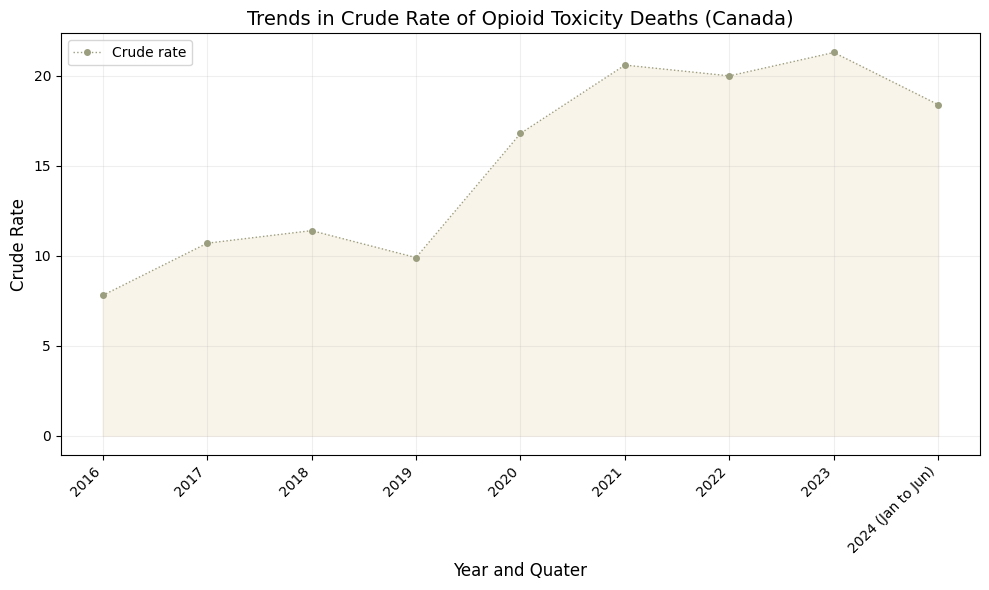

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(
    total_apr_opioid_deaths['Year_Quarter'],
    total_apr_opioid_deaths['Value_numeric'],
    color='#9C9E80',
    marker='.',
    label='Crude rate',
    linestyle='dotted',
    linewidth=1, markersize=8
    )

plt.fill_between(total_apr_opioid_deaths['Year_Quarter'], 
                 total_apr_opioid_deaths['Value_numeric'],
                 color='#F9F4EA',
                alpha=1
                 )

plt.title('Trends in Crude Rate of Opioid Toxicity Deaths (Canada)', fontsize=14)
plt.xlabel('Year and Quater', fontsize = 12)
plt.ylabel('Crude Rate', fontsize = 12),
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()

plt.show()

In [14]:
acd_opioid_deaths = data[
    (data['Substance'] == 'Opioids')&
    (data['Region']=='Canada')&
    (data['Specific_Measure']=='Overall numbers')&
    (data['Unit']=='Crude rate')
    &(data['Type_Event']=='Accidental apparent opioid toxicity deaths')
    ]
# convert Value from object to numeric only for Value within search criteria added into Value_numeric column 
acd_opioid_deaths['Value_numeric'] = pd.to_numeric(acd_opioid_deaths['Value'], errors='coerce')

/var/folders/17/njh92ccn75l5xb8knljb82tc0000gn/T/ipykernel_6112/1434891019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acd_opioid_deaths['Value_numeric'] = pd.to_numeric(acd_opioid_deaths['Value'], errors='coerce')


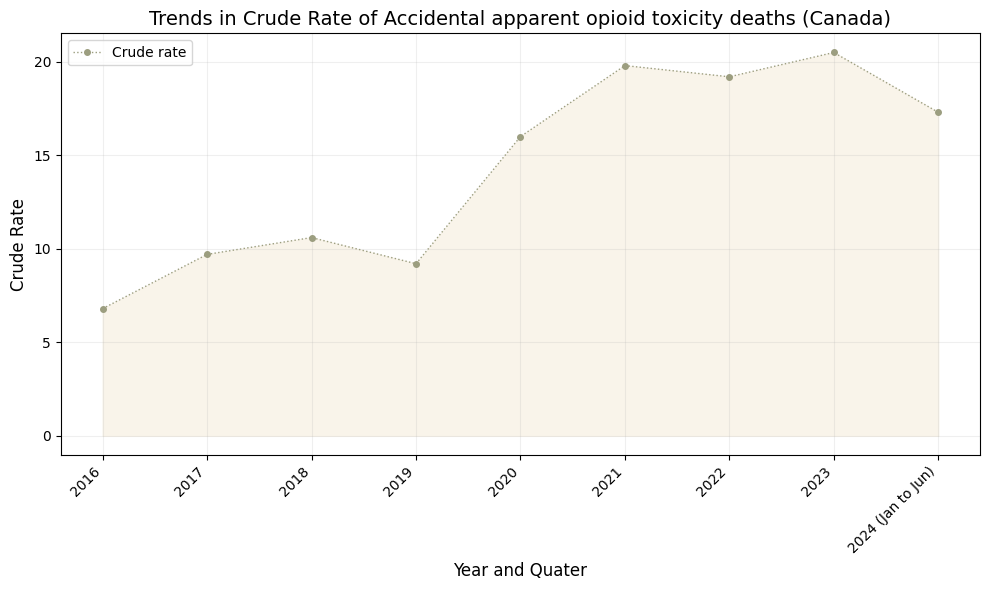

In [15]:
plt.figure(figsize=(10,6))
plt.plot(
    acd_opioid_deaths['Year_Quarter'],
    acd_opioid_deaths['Value_numeric'],
    color='#9C9E80',
    marker='.',
    label='Crude rate',
    linestyle='dotted',
    linewidth=1, markersize=8
    )

plt.fill_between(acd_opioid_deaths['Year_Quarter'], 
                 acd_opioid_deaths['Value_numeric'],
                 color='#F9F4EA',
                alpha=1
                 )

plt.title('Trends in Crude Rate of Accidental apparent opioid toxicity deaths (Canada)', fontsize=14)
plt.xlabel('Year and Quater', fontsize = 12)
plt.ylabel('Crude Rate', fontsize = 12),
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()

plt.show()

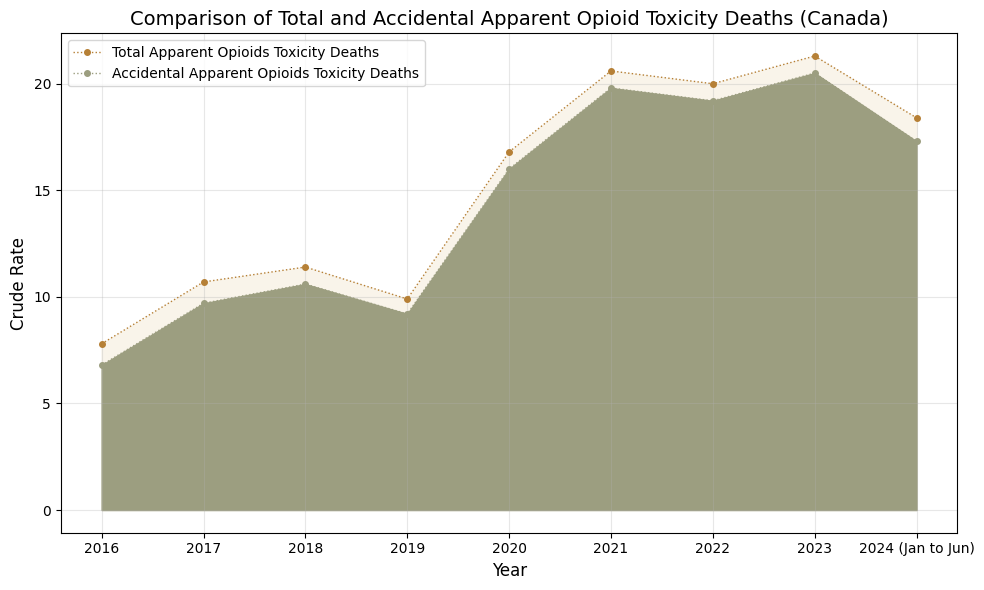

In [18]:
plt.figure(figsize=(10,6))

plt.plot(total_apr_opioid_deaths['Year_Quarter'],total_apr_opioid_deaths['Value_numeric'],
        color='#B68036',
        marker='.',
        label='Total Apparent Opioids Toxicity Deaths',
        linestyle='dotted',
        linewidth=1, markersize=8)

plt.plot(acd_opioid_deaths['Year_Quarter'],acd_opioid_deaths['Value_numeric'],
        color='#9C9E80',
        marker='.',
        label='Accidental Apparent Opioids Toxicity Deaths',
        linestyle='dotted',
        linewidth=1, markersize=8)

plt.fill_between(total_apr_opioid_deaths['Year_Quarter'], 
                 total_apr_opioid_deaths['Value_numeric'],
                 color='#F9F4EA',
                alpha=1
                 )

plt.fill_between(acd_opioid_deaths['Year_Quarter'], 
                 acd_opioid_deaths['Value_numeric'],
                 color='#9C9E80',
                alpha=1
                 )

# Add labels, title, and legend
plt.title('Comparison of Total and Accidental Apparent Opioid Toxicity Deaths (Canada)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crude Rate', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(acd_opioid_deaths['Year_Quarter'])  # Ensure Year appears correctly on x-axis
plt.legend()
plt.tight_layout()
plt.show()